We will use those libraries in this tutorial:

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [101]:
df_train=read_csv('data/train.csv',header=0,index_col=0,parse_dates=['date'])
df_oil = read_csv('data/oil.csv',header=0,parse_dates=['date'])
df_stores = read_csv('data/stores.csv',header=0,index_col=0)
df_transactions = read_csv('data/transactions.csv',header=0,parse_dates=['date'])
df_holidays = read_csv('data/holidays_events.csv',header=0,parse_dates=['date'])

In [102]:
df_train.tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000878,2017-08-15,9,MAGAZINES,11.000,0
3000879,2017-08-15,9,MEATS,449.228,0
3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000881,2017-08-15,9,PET SUPPLIES,6.000,0
3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [103]:
df_oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


As you can see, we have 43 missing values in oil dataset.

In [104]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [105]:
df_oil.iloc[0,1]=df_oil.iloc[1,1]
df_oil.fillna(method='ffill', inplace=True)
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Now, let's merge all the dataframes.

In [106]:
df_train = df_train.merge(df_oil, on='date', how='left')
df_train = df_train.merge(df_stores, on='store_nbr', how='left')
df_train = df_train.merge(df_transactions, on=['date','store_nbr'], how='left')
df_train = df_train.merge(df_holidays, on='date', how='left')

In [107]:
df_train

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


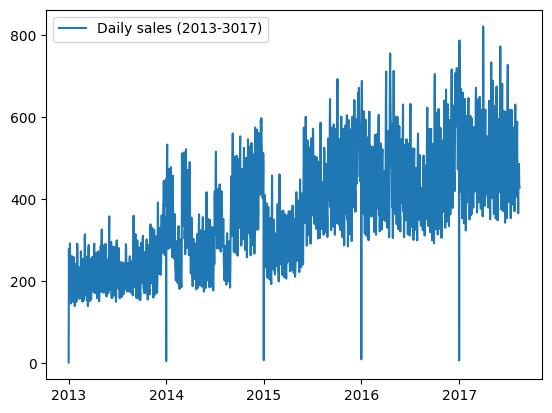

In [108]:
df_plot=df_train[["date","sales"]].groupby(by='date',as_index=False).mean()
pyplot.plot(df_plot['date'],df_plot['sales'],label='Daily sales (2013-3017)')
pyplot.legend()
pyplot.show()

Text(0, 0.5, 'Daily sales')

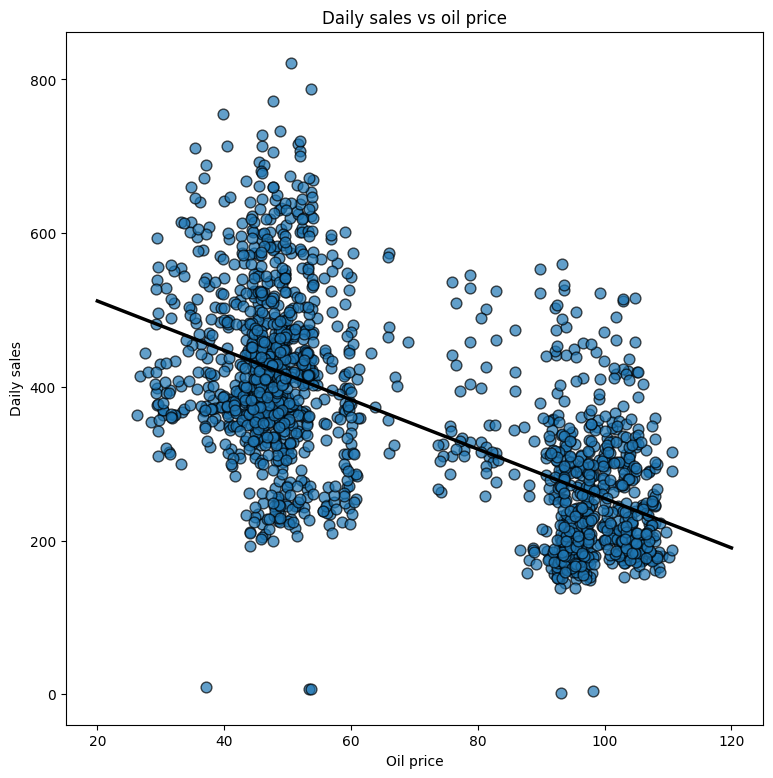

In [124]:
df_plot = df_train[["date","dcoilwtico","sales"]].groupby(by='date').mean()
df_plot.fillna(method='ffill',inplace=True)


# Initialize layout
fig, ax = pyplot.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(df_plot['dcoilwtico'], df_plot['sales'], label='Daily sales vs oil price',
           s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
b, a = np.polyfit(df_plot['dcoilwtico'], df_plot['sales'], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(20, 120, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
ax.title.set_text('Daily sales vs oil price')
ax.set_xlabel('Oil price')
ax.set_ylabel('Daily sales')

In [130]:
df_plot=df_train[["date","sales","onpromotion"]].groupby(by='date').mean()
df_plot['promotion']=0 if df_plot['onpromotion']=0 else 1
df_plot.tail(20)




SyntaxError: expected 'else' after 'if' expression (2438035462.py, line 2)

In [141]:




























df_plot=df_train[["date","sales","onpromotion"]].groupby(by='date').mean()
df_plot['promotion']=df_plot['onpromotion'].apply(lambda x: 1 if x>1 else 0)
#df_plot[["date","promotion"]].groupby(by='promotion').count()
df_plot.groupby(['promotion'])['promotion'].count()


promotion
0    794
1    890
Name: promotion, dtype: int64